In [ ]:
# Transformimi i nje modeli te dhenash te regresionit ne model kalsifikimi
# i kurpojme rangune  vlerave ne bins (groups)
# pastaj bejme parashikimin si model klasifikimi

# qcut() - funksioni i cili 
# kthen te dhenat e vazhdueshme ne te dhena kategorike 
# duke i organizuar ne grupe sipas quartileve

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
raw_df = pd.read_excel("2018_Sales_Total_v2.xlsx")
raw_df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2018-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2018-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2018-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2018-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2018-01-01 23:26:55


In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   account number  1507 non-null   int64         
 1   name            1507 non-null   object        
 2   sku             1507 non-null   object        
 3   quantity        1507 non-null   int64         
 4   unit price      1507 non-null   float64       
 5   ext price       1507 non-null   float64       
 6   date            1507 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 82.5+ KB


In [3]:
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account number  20 non-null     int64  
 1   name            20 non-null     object 
 2   ext price       20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 612.0+ bytes


<Axes: ylabel='Frequency'>

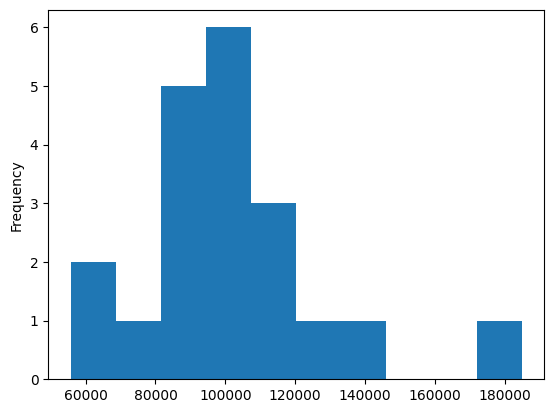

In [5]:
df['ext price'].plot(kind='hist')

In [6]:
df['ext price'].describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

In [ ]:
# perdorim funk qcut per te ndare kolonen e totpagesa ne 4 grupime (q=4)
pd.qcut(df['ext price'], q=4)

In [7]:
# i shtojme si kolona ne dataframein tone
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [8]:

df['quantile_ex_1'].value_counts()

quantile_ex_1
(55733.049000000006, 89137.708]    5
(89137.708, 100271.535]            5
(100271.535, 110132.552]           5
(110132.552, 184793.7]             5
Name: count, dtype: int64

In [9]:
df['quantile_ex_2'].value_counts()




quantile_ex_2
(55732.0, 76471.0]      2
(76471.0, 87168.0]      2
(87168.0, 90686.0]      2
(90686.0, 95908.0]      2
(95908.0, 100272.0]     2
(100272.0, 103606.0]    2
(103606.0, 105938.0]    2
(105938.0, 112290.0]    2
(112290.0, 124778.0]    2
(124778.0, 184794.0]    2
Name: count, dtype: int64

In [10]:
# ne me ane te labels mund te shtojme kolone te ndare ne grupe, 
# por jo sipas rangut te vlerave po sipa label per secilin rang
# ne kete moment une them qe variabli i vazhdueshem ext_price eshte kthyer ne nje variabel kategorik
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [11]:
df['quantile_ex_3'].value_counts()


quantile_ex_3
Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: count, dtype: int64

In [12]:
results, bin_edges = pd.qcut(df['ext price'],
                             q=[0, .2, .4, .6, .8, 1],
                             labels=bin_labels_5,
                             retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                             columns=['Threshold', 'Tier'])
results_table

,Threshold,Tier
0,55733.050,Bronze
1,87167.958,Silver
2,95908.156,Gold
3,103605.970,Platinum
4,112290.054,Diamond


In [13]:
df.describe(include='category')


,quantile_ex_1,quantile_ex_2,quantile_ex_3
count,20,20,20
unique,4,10,5
top,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze
freq,5,2,4


In [14]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,101711.287500
std,231499.208970,27037.449673
min,141962.000000,55733.050000
0%,141962.000000,55733.050000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,184793.700000
max,786968.000000,184793.700000


In [15]:
# shtojme nje kolone tjeter me quartil 5 por me kode jo me label, qe te kemi me te lehte ndertimin e alor te klasfikimit
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False)
df.head()


,account number,name,ext price,quantile_ex_1,quantile_ex_2,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]",Bronze,0
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold,2
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]",Bronze,0
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]",Diamond,4
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver,1


In [16]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])
df.head()

,account number,name,ext price
0,141962,Herman LLC,63626.03
1,146832,Kiehn-Spinka,99608.77
2,163416,Purdy-Kunde,77898.21
3,218895,Kulas Inc,137351.96
4,239344,Stokes LLC,91535.92


In [17]:
pd.cut(df['ext price'], bins=4)

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(55603.989, 87998.212] < (87998.212, 120263.375] < (120263.375, 152528.538] < (152528.538, 184793.7]]

In [18]:
pd.cut(df['ext price'], bins=4).value_counts()



ext price
(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: count, dtype: int64

In [19]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
df.head()

,account number,name,ext price,cut_ex1
0,141962,Herman LLC,63626.03,silver
1,146832,Kiehn-Spinka,99608.77,gold
2,163416,Purdy-Kunde,77898.21,gold
3,218895,Kulas Inc,137351.96,diamond
4,239344,Stokes LLC,91535.92,gold


In [20]:
np.linspace(0, 200000, 9)

array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
       175000., 200000.])

In [21]:
df['cut_ex2'] = pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))
df.head()

,account number,name,ext price,cut_ex1,cut_ex2
0,141962,Herman LLC,63626.03,silver,"(50000.0, 75000.0]"
1,146832,Kiehn-Spinka,99608.77,gold,"(75000.0, 100000.0]"
2,163416,Purdy-Kunde,77898.21,gold,"(75000.0, 100000.0]"
3,218895,Kulas Inc,137351.96,diamond,"(125000.0, 150000.0]"
4,239344,Stokes LLC,91535.92,gold,"(75000.0, 100000.0]"


In [22]:
np.arange(0, 200000, 10000)

df['cut_ex3'] = pd.cut(df['ext price'], bins= np.arange(0, 200000, 10000))
df.head()


,account number,name,ext price,cut_ex1,cut_ex2,cut_ex3
0,141962,Herman LLC,63626.03,silver,"(50000.0, 75000.0]","(60000, 70000]"
1,146832,Kiehn-Spinka,99608.77,gold,"(75000.0, 100000.0]","(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,gold,"(75000.0, 100000.0]","(70000, 80000]"
3,218895,Kulas Inc,137351.96,diamond,"(125000.0, 150000.0]","(130000, 140000]"
4,239344,Stokes LLC,91535.92,gold,"(75000.0, 100000.0]","(90000, 100000]"


In [23]:
pd.interval_range(start=0, freq=10000, end=200000, closed='left')

IntervalIndex([[0, 10000), [10000, 20000), [20000, 30000), [30000, 40000), [40000, 50000) ... [150000, 160000), [160000, 170000), [170000, 180000), [180000, 190000), [190000, 200000)], dtype='interval[int64, left]')

In [24]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df['cut_ex4'] = pd.cut(df['ext price'], bins=interval_range, labels=[1,2,3])
df.head()

,account number,name,ext price,cut_ex1,cut_ex2,cut_ex3,cut_ex4
0,141962,Herman LLC,63626.03,silver,"(50000.0, 75000.0]","(60000, 70000]","(60000, 70000]"
1,146832,Kiehn-Spinka,99608.77,gold,"(75000.0, 100000.0]","(90000, 100000]","(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,gold,"(75000.0, 100000.0]","(70000, 80000]","(70000, 80000]"
3,218895,Kulas Inc,137351.96,diamond,"(125000.0, 150000.0]","(130000, 140000]","(130000, 140000]"
4,239344,Stokes LLC,91535.92,gold,"(75000.0, 100000.0]","(90000, 100000]","(90000, 100000]"
